In [1]:
import sys
sys.path.append('../')

In [2]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [71]:
num_qubits = 5

In [72]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [73]:
num_layers = 1
var_state_class = ZGR_ansatz(num_qubits, num_layers)
#var_state_class = Rot_ansatz(num_qubits,num_layers)
#var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 6400x600 with 1 Axes>, <Axes: >)

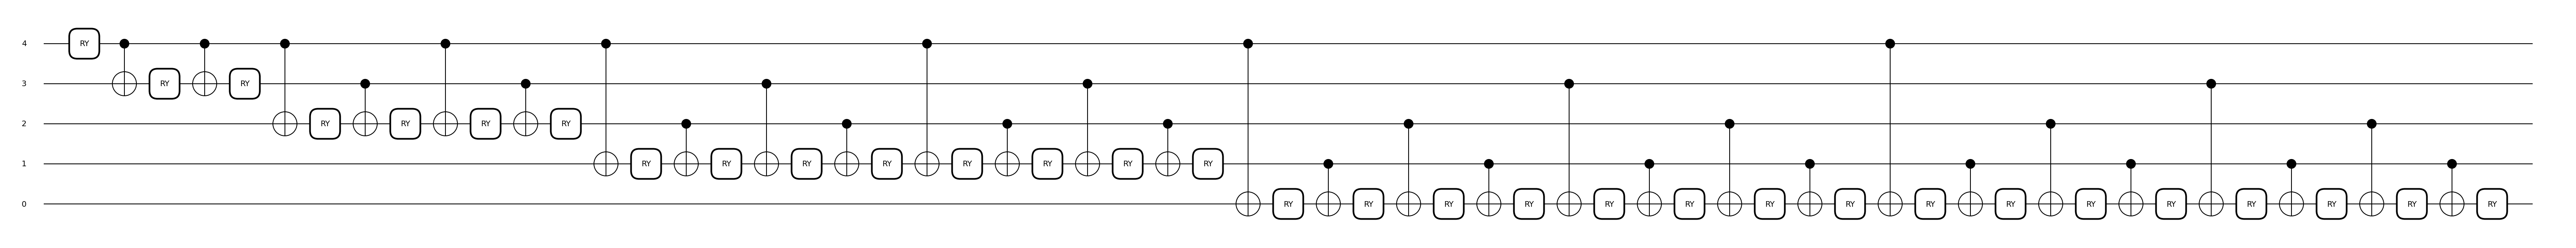

In [74]:
qml.draw_mpl( var_state )( num_params*[0] )

In [75]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state,
                    init_state = init_state,
                    semi_classical=False
                    )

In [76]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
vals

array([-0.47997511, -0.11445451, -0.05192538, -0.02696533, -0.02098562,
        0.02113898,  0.02262916,  0.09479111,  0.09731981,  0.19349922,
        0.19805131,  0.31633205,  0.32371134,  0.4628699 ,  0.47376006,
        0.63288683,  0.64790227,  0.82624637,  0.84599124,  1.04286034,
        1.0679913 ,  1.28268526,  1.31397407,  1.54572834,  1.58415415,
        1.83214154,  1.87900524,  2.14242336,  2.19963967,  2.47917115,
        2.54944517,  2.88329965])

In [77]:
beta = np.exp(-0.5*np.sqrt(np.abs(val)))/(2*np.sqrt(np.abs(val)))

In [78]:
beta

0.5104115895695532

In [82]:
1/16

0.0625

In [83]:
vals[3]/vals[0]

0.05618067812131089

In [85]:
params_init = np.random.randn( num_params )*0.001
#params_pre = params_ground[-1]
#params_ground, energies_ground = varqft.run( np.concatenate((params_pre,np.random.randn(num_qubits)*1e-3)), max_iterations=500, learning_rate=0.5, conv_tol=1e-6 )
params_ground, energies_ground = varqft.run( params_init , max_iterations=500, learning_rate=0.2, conv_tol=1e-6 )

Step = 0,  Energy = 0.79739058
Step = 5,  Energy = 0.10131919
Step = 10,  Energy = -0.08706459
Step = 15,  Energy = -0.11092143
Step = 20,  Energy = -0.11886549
Step = 25,  Energy = -0.17080101
Step = 30,  Energy = -0.16537243
Step = 35,  Energy = -0.18014461
Step = 40,  Energy = -0.19068681
Step = 45,  Energy = -0.20226809
Step = 50,  Energy = -0.27007240
Step = 55,  Energy = -0.38276106
Step = 60,  Energy = -0.39480454
Step = 65,  Energy = -0.39646286
Step = 70,  Energy = -0.43436271
Step = 75,  Energy = -0.44596076
Step = 80,  Energy = -0.46696767
Step = 85,  Energy = -0.46115774
Step = 90,  Energy = -0.46620527
Step = 95,  Energy = -0.47028875
Step = 100,  Energy = -0.46950611
Step = 105,  Energy = -0.47075212
Step = 110,  Energy = -0.47135073
Step = 115,  Energy = -0.47182405
Step = 120,  Energy = -0.47247350
Step = 125,  Energy = -0.47340858
Step = 130,  Energy = -0.47468230
Step = 135,  Energy = -0.47632280
Step = 140,  Energy = -0.47790813
Step = 145,  Energy = -0.47871089
Step

In [90]:
#params_init

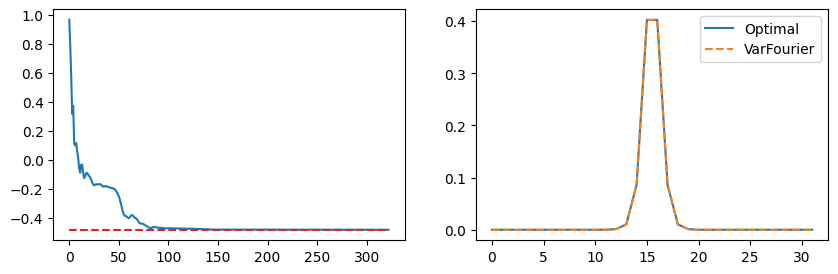

In [91]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vecs[:,0])**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

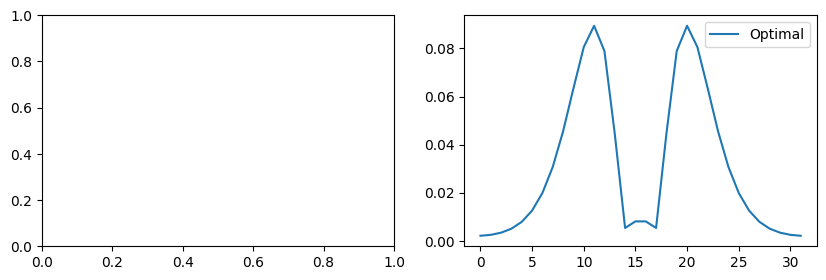

In [92]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

#ax[0].plot( energies_ground )
#ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

#ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vecs[:,2])**2) 
#ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [93]:
abs(np.vdot( ground_state, vec ))**2

0.9999162805951853

In [94]:
params_ground[-1]

Array([ 1.5707085e+00, -6.6268867e-01,  1.5709212e+00,  2.7871183e-01,
        4.0893119e-05,  1.1859639e+00, -1.5731198e+00,  9.2165425e-02,
        3.1260841e-02, -9.0557277e-02, -3.0728301e-02,  1.1250855e-01,
        3.6875229e-02, -1.6855637e+00,  1.5331436e+00, -7.2910175e-02,
       -5.4148909e-02,  6.6979654e-02,  5.2790485e-02,  5.8185950e-02,
        5.9562229e-02, -5.2376058e-02, -5.8269922e-02, -1.0689142e-01,
       -7.6579742e-02,  1.0092520e-01,  7.5863905e-02, -6.3705301e-01,
       -4.9543434e-01, -9.2764437e-01, -1.0746254e+00], dtype=float32)

In [95]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [96]:
params_init_ex = np.random.randn( num_params )*0.001

params_excited, energies_excited = varqft.run( params_ground[-1], max_iterations=400, learning_rate= 0.1, conv_tol=1e-6)

/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'autograd', 'jax'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Step = 0,  Energy = 23.95003319
Step = 5,  Energy = 8.23291874
Step = 10,  Energy = 3.01295853
Step = 15,  Energy = 0.92855394
Step = 20,  Energy = 1.03547537
Step = 25,  Energy = 0.98454797
Step = 30,  Energy = 0.85399544
Step = 35,  Energy = 0.74317843
Step = 40,  Energy = 0.70204854
Step = 45,  Energy = 0.64799732
Step = 50,  Energy = 0.62204051
Step = 55,  Energy = 0.58918279
Step = 60,  Energy = 0.56241959
Step = 65,  Energy = 0.53761524
Step = 70,  Energy = 0.52047634
Step = 75,  Energy = 0.50106537
Step = 80,  Energy = 0.48204395
Step = 85,  Energy = 0.45634893
Step = 90,  Energy = 0.42094544
Step = 95,  Energy = 0.37713450
Step = 100,  Energy = 0.33249554
Step = 105,  Energy = 0.28582546
Step = 110,  Energy = 0.23852359
Step = 115,  Energy = 0.20033260
Step = 120,  Energy = 0.17700180
Step = 125,  Energy = 0.16603617
Step = 130,  Energy = 0.15730199
Step = 135,  Energy = 0.14115644
Step = 140,  Energy = 0.11570797
Step = 145,  Energy = 0.08920821
Step = 150,  Energy = 0.0696945

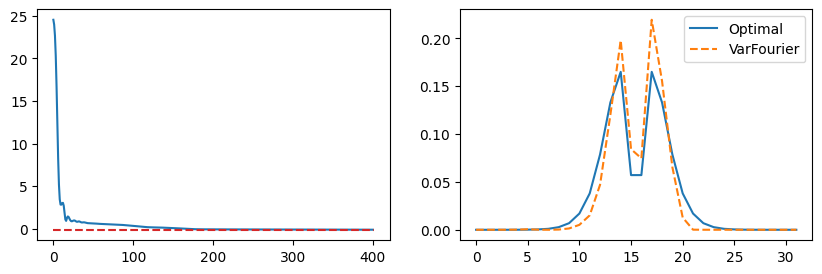

In [97]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val2, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[-1] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [98]:
abs(np.vdot( ground_state, vec ))**2

0.9999162805951853

In [99]:
abs(np.vdot( ground_state, excited_state ))**2 

3.60961260881254e-08

In [100]:
abs(np.vdot( excited_state, vec2 ))**2

0.9376236042408553

In [101]:
energies_excited[-1]/energies_ground[-1]

Array(0.22101378, dtype=float32)

In [102]:
vals[1]/vals[0]

0.23845925418564895

In [104]:
len([1,2])

2